# Asthma and Pollution Exploratory Data Analysis
Ainsley Atherton, Nikki La, Jordan Ledbetter, Palaniappan Vijay Sithambaram


In [6]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Datasets

In [7]:
#Read in the data

#Asthma
folder_path = 'CDC_Asthma_Data'
asthma_prev = pd.read_csv(folder_path + '/Adult_Asthma_prev2018-2021/data_180748.csv')
asthma_hosp = pd.read_csv(folder_path + '/Asthma_Hospitalizations2000-2021/data_181454.csv')
asthma_er = pd.read_csv(folder_path + '/ER_visits_Asthma2000-2021/data_181211.csv')


In [8]:
#EPA Data (will probably want to merge these into one dataset)
AQI_folder_path = 'CDC_Asthma_Data/AQI_data'
AQI2000 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2000.csv')
AQI2001 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2001.csv')
AQI2002 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2002.csv')
AQI2003 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2003.csv')
AQI2004 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2004.csv')
AQI2005 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2005.csv')
AQI2006 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2006.csv')
AQI2007 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2007.csv')
AQI2008 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2008.csv')
AQI2009 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2009.csv')
AQI2010 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2010.csv')
AQI2011 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2011.csv')
AQI2012 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2012.csv')
AQI2013 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2013.csv')
AQI2014 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2014.csv')
AQI2015 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2015.csv')
AQI2016 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2016.csv')
AQI2017 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2017.csv')
AQI2018 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2018.csv')
AQI2019 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2019.csv')
AQI2020 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2020.csv')
AQI2021 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2021.csv')

### Asthma Prevalence

In [9]:
asthma_prev.shape
print(asthma_prev.head())

   StateFIPS    State  CountyFIPS   County  Year  Value  Data Comment  \
0          1  Alabama        1001  Autauga  2018   10.2           NaN   
1          1  Alabama        1001  Autauga  2019    9.7           NaN   
2          1  Alabama        1001  Autauga  2020    9.8           NaN   
3          1  Alabama        1001  Autauga  2021   10.2           NaN   
4          1  Alabama        1003  Baldwin  2018    9.6           NaN   

  95% Confidence Interval  Confidence Interval Low  Confidence Interval High  \
0            (9.6 - 10.8)                      9.6                      10.8   
1            (9.2 - 10.3)                      9.2                      10.3   
2            (9.4 - 10.4)                      9.4                      10.4   
3            (8.9 - 11.6)                      8.9                      11.6   
4            (9.1 - 10.2)                      9.1                      10.2   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN  
3          N

No null values in columns we want to keep:

In [10]:
asthma_prev.rename(columns = {'Value':'Prevalence %'}, inplace = True) 
asthma_prev.isnull().sum()

StateFIPS                       0
State                           0
CountyFIPS                      0
County                          0
Year                            0
Prevalence %                    0
Data Comment                12482
95% Confidence Interval         0
Confidence Interval Low         0
Confidence Interval High        0
Unnamed: 10                 12482
dtype: int64

Removing data comment and unnamed columns as we don't need them

In [11]:
asthma_prev = asthma_prev.drop(['Data Comment'], axis=1)
asthma_prev = asthma_prev.drop(['Unnamed: 10'], axis=1)
asthma_prev = asthma_prev.drop(['95% Confidence Interval', 'Confidence Interval Low', 'Confidence Interval High'], axis=1)
asthma_prev

StateFIPS    State  CountyFIPS    County  Year  Prevalence %
0              1  Alabama        1001   Autauga  2018          10.2
1              1  Alabama        1001   Autauga  2019           9.7
2              1  Alabama        1001   Autauga  2020           9.8
3              1  Alabama        1001   Autauga  2021          10.2
4              1  Alabama        1003   Baldwin  2018           9.6
...          ...      ...         ...       ...   ...           ...
12477         56  Wyoming       56043  Washakie  2021           9.6
12478         56  Wyoming       56045    Weston  2018           9.3
12479         56  Wyoming       56045    Weston  2019           9.0
12480         56  Wyoming       56045    Weston  2020           9.8
12481         56  Wyoming       56045    Weston  2021           9.7

[12482 rows x 6 columns]

Looks good now, ready for merging

### Hospitalizations due to Asthma
- Age adjusted rate of hospitalization for asthma per 10,000

In [12]:
print(asthma_hosp.head())
df = asthma_hosp.sort_values(by = 'Year', ascending = True)
df

   StateFIPS    State  CountyFIPS  County  Year Value Data Comment  Unnamed: 7
0          4  Arizona        4001  Apache  2005   7.2          NaN         NaN
1          4  Arizona        4001  Apache  2006   4.8          NaN         NaN
2          4  Arizona        4001  Apache  2007   3.6          NaN         NaN
3          4  Arizona        4001  Apache  2008   5.1          NaN         NaN
4          4  Arizona        4001  Apache  2009   5.6          NaN         NaN


StateFIPS           State  CountyFIPS    County  Year       Value  \
20101         35      New Mexico       35013  Dona Ana  2000         6.1   
22114         37  North Carolina       37015    Bertie  2000        22.9   
22103         37  North Carolina       37013  Beaufort  2000        22.7   
3537          12         Florida       12081   Manatee  2000        11.7   
22092         37  North Carolina       37011     Avery  2000        12.1   
...          ...             ...         ...       ...   ...         ...   
20232         35      New Mexico       35023   Hidalgo  2021         0.0   
20254         35      New Mexico       35025       Lea  2021         3.2   
20276         35      New Mexico       35027   Lincoln  2021  Suppressed   
20166         35      New Mexico       35017     Grant  2021  Suppressed   
33477         55       Wisconsin       55141      Wood  2021         1.2   

      Data Comment  Unnamed: 7  
20101          NaN         NaN  
22114          NaN         NaN  
22103          NaN         NaN  
3537           NaN         NaN  
22092          NaN         NaN  
...            ...         ...  
20232          NaN         NaN  
20254          NaN         NaN  
20276     Unstable         NaN  
20166     Unstable         NaN  
33477     Unstable         NaN  

[33478 rows x 8 columns]

In [13]:
print(asthma_hosp.shape)

(33478, 8)


In [14]:
print(asthma_hosp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33478 entries, 0 to 33477
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StateFIPS     33478 non-null  int64  
 1   State         33478 non-null  object 
 2   CountyFIPS    33478 non-null  int64  
 3   County        33478 non-null  object 
 4   Year          33478 non-null  int64  
 5   Value         33478 non-null  object 
 6   Data Comment  10363 non-null  object 
 7   Unnamed: 7    0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB
None


In [15]:
# Rename Value column
asthma_hosp.rename(columns = {'Value':'Hospitalizations (rate per 10,000)'}, inplace = True) 

In [16]:
# Check for missing values
asthma_hosp.isnull().sum()

StateFIPS                                 0
State                                     0
CountyFIPS                                0
County                                    0
Year                                      0
Hospitalizations (rate per 10,000)        0
Data Comment                          23115
Unnamed: 7                            33478
dtype: int64

In [17]:
# Remove all-null columns
asthma_hosp = asthma_hosp.drop(columns = 'Unnamed: 7')

In [18]:
# Identify unique comments
asthma_hosp['Data Comment'].unique()

array([nan, 'Unstable'], dtype=object)

In [19]:
# Calculate percentage of suppressed data
is_suppressed = asthma_hosp[asthma_hosp['Hospitalizations (rate per 10,000)'] == 'Suppressed']
print('Percentage of Suppressed Data:', (len(is_suppressed) / len(asthma_hosp)) * 100)

Percentage of Suppressed Data: 15.97168289623036


In [20]:
# Calculate percentage of unstability
is_unstable = asthma_hosp[asthma_hosp['Data Comment'] == 'Unstable']
print('Percentage of Unstability:', (len(is_unstable) / len(asthma_hosp)) * 100)

Percentage of Unstability: 30.954656789533423


In [21]:
# Asthma Hospitalizations: 2000-2021
asthma_hosp['Hospitalizations (rate per 10,000)'] = asthma_hosp['Hospitalizations (rate per 10,000)'].replace('Suppressed', np.nan) #convert 'Supressed' values to NaN
asthma_hosp['Hospitalizations (rate per 10,000)'] = pd.to_numeric(asthma_hosp['Hospitalizations (rate per 10,000)']) #convert value to numeric column

In [22]:
# Descriptive Statistics
asthma_hosp['Hospitalizations (rate per 10,000)'].describe()

count    28131.000000
mean         9.761658
std          8.303374
min          0.000000
25%          4.900000
50%          8.100000
75%         12.400000
max        154.500000
Name: Hospitalizations (rate per 10,000), dtype: float64

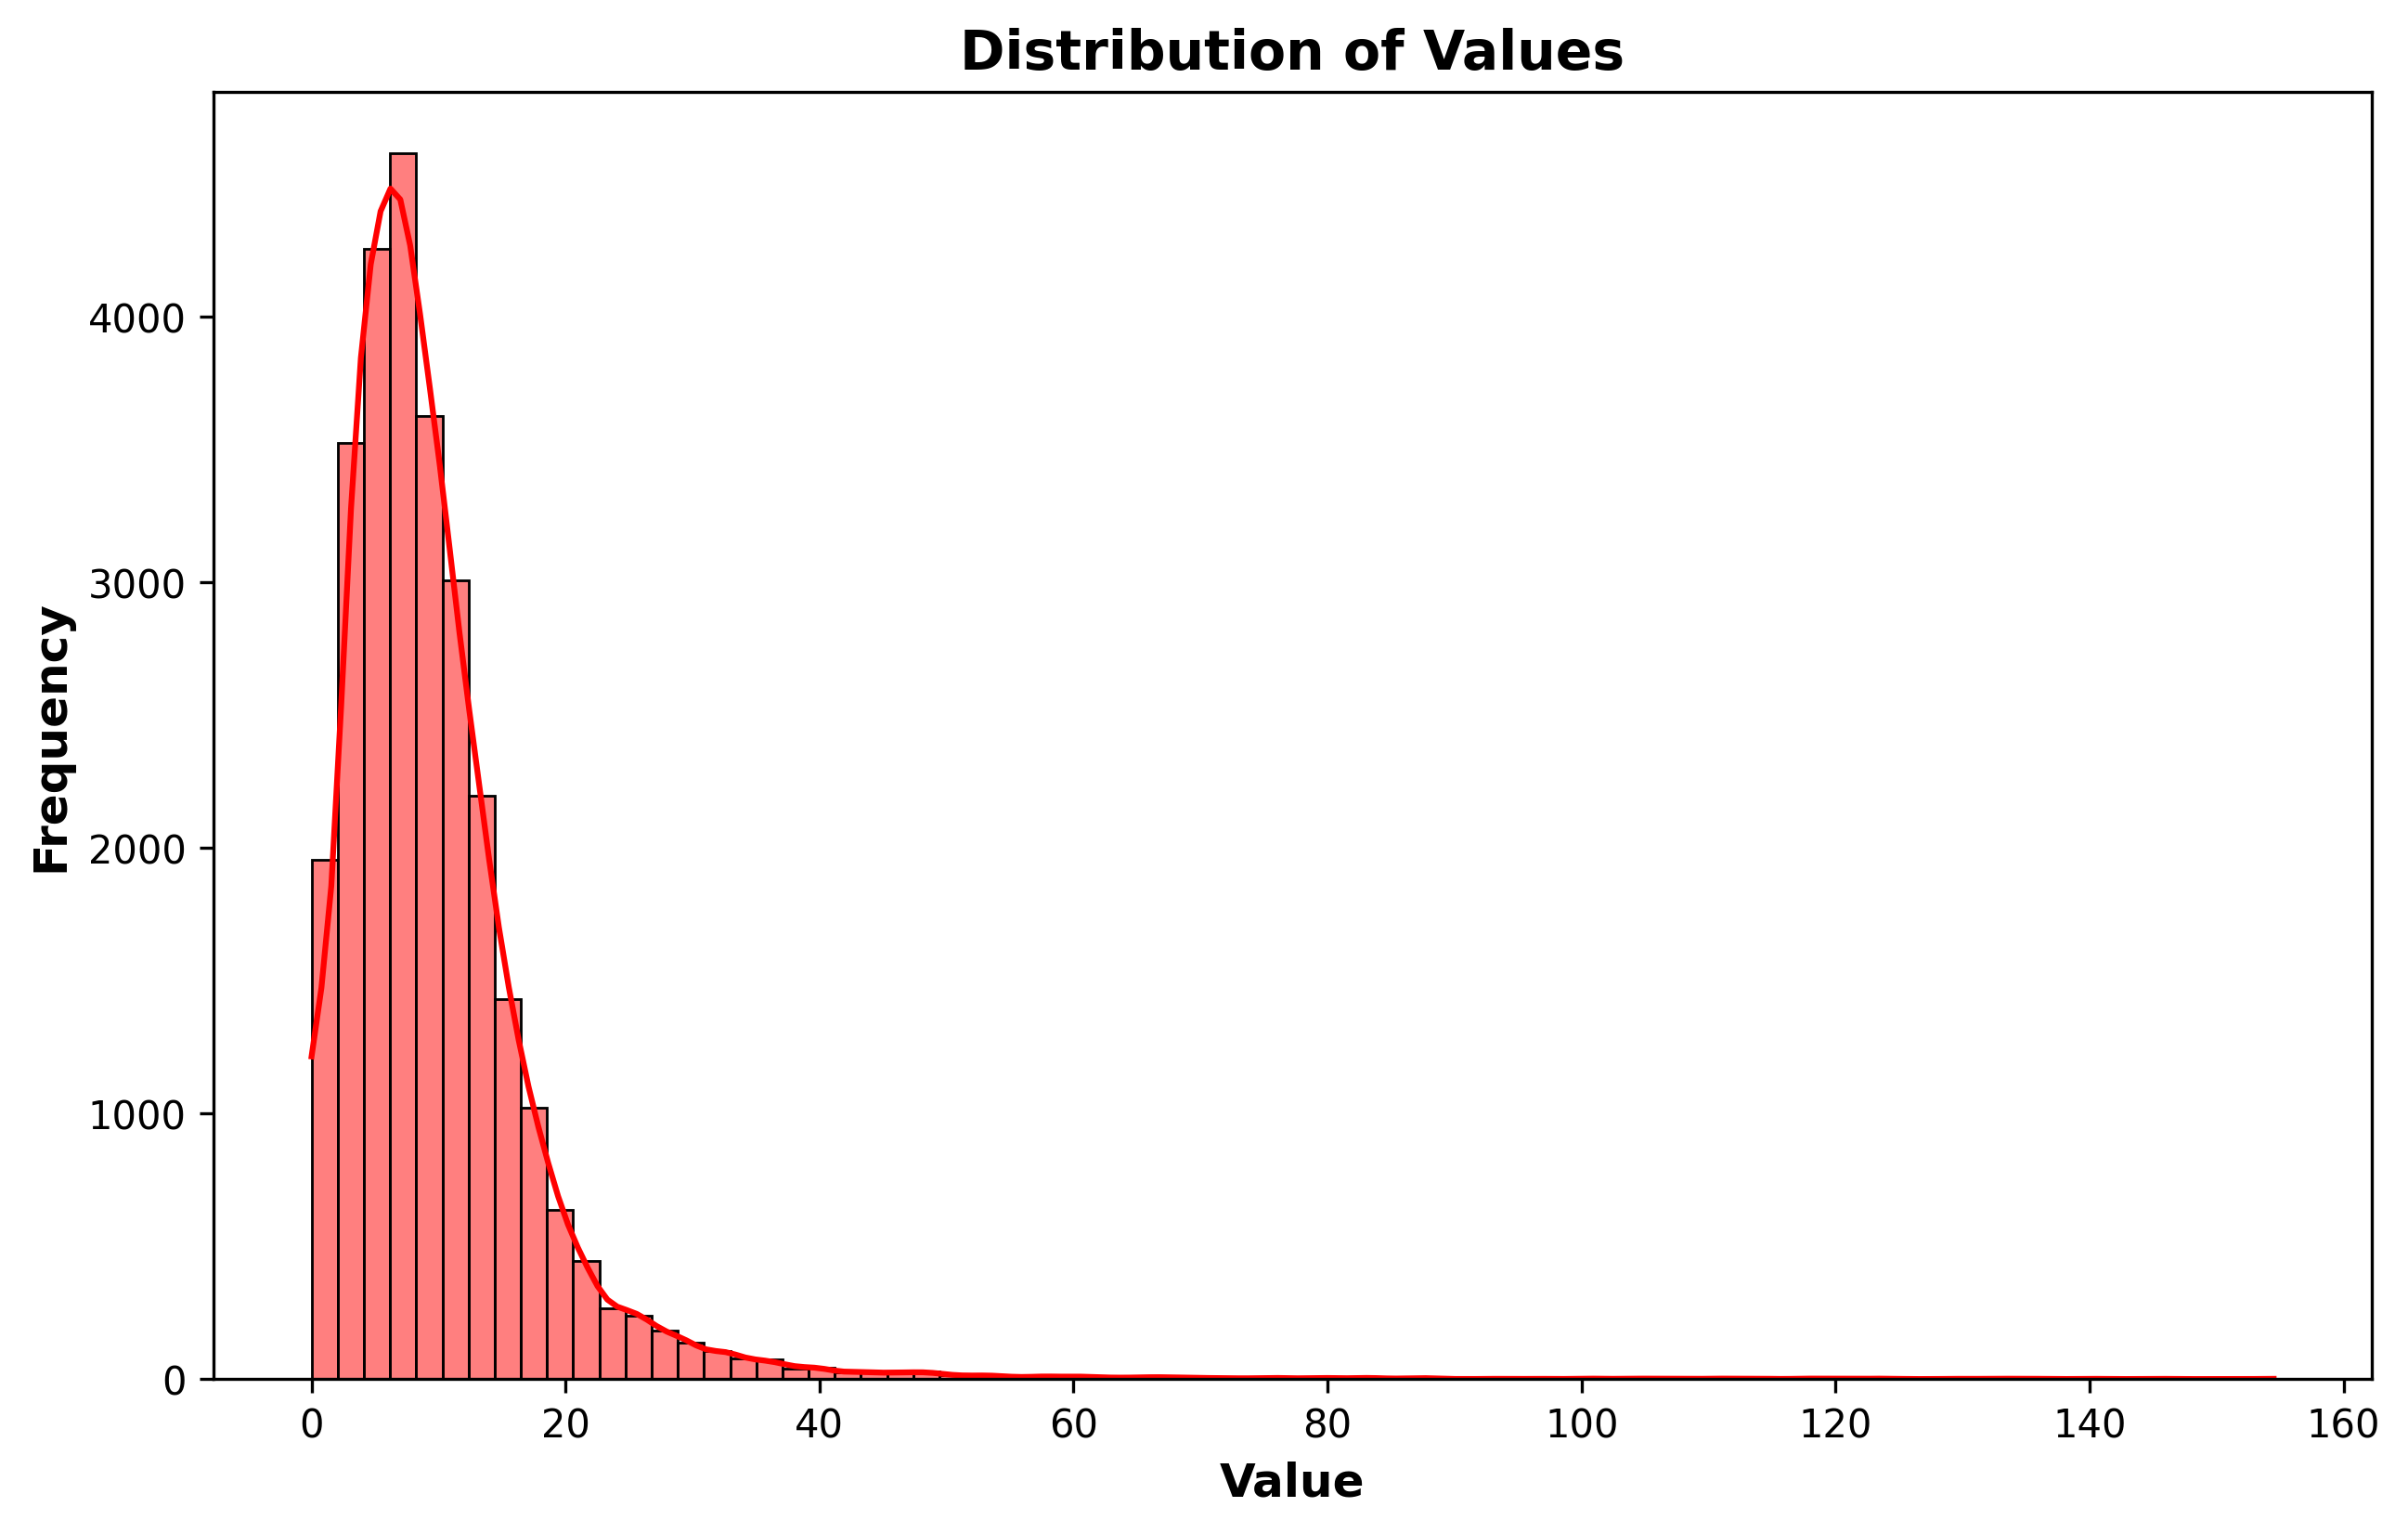

In [23]:
# Distribution of Values
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(data=asthma_hosp, x='Hospitalizations (rate per 10,000)', bins=75, kde=True, color='red')
plt.title('Distribution of Values', fontsize=14, fontweight='bold')
plt.xlabel('Value', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()

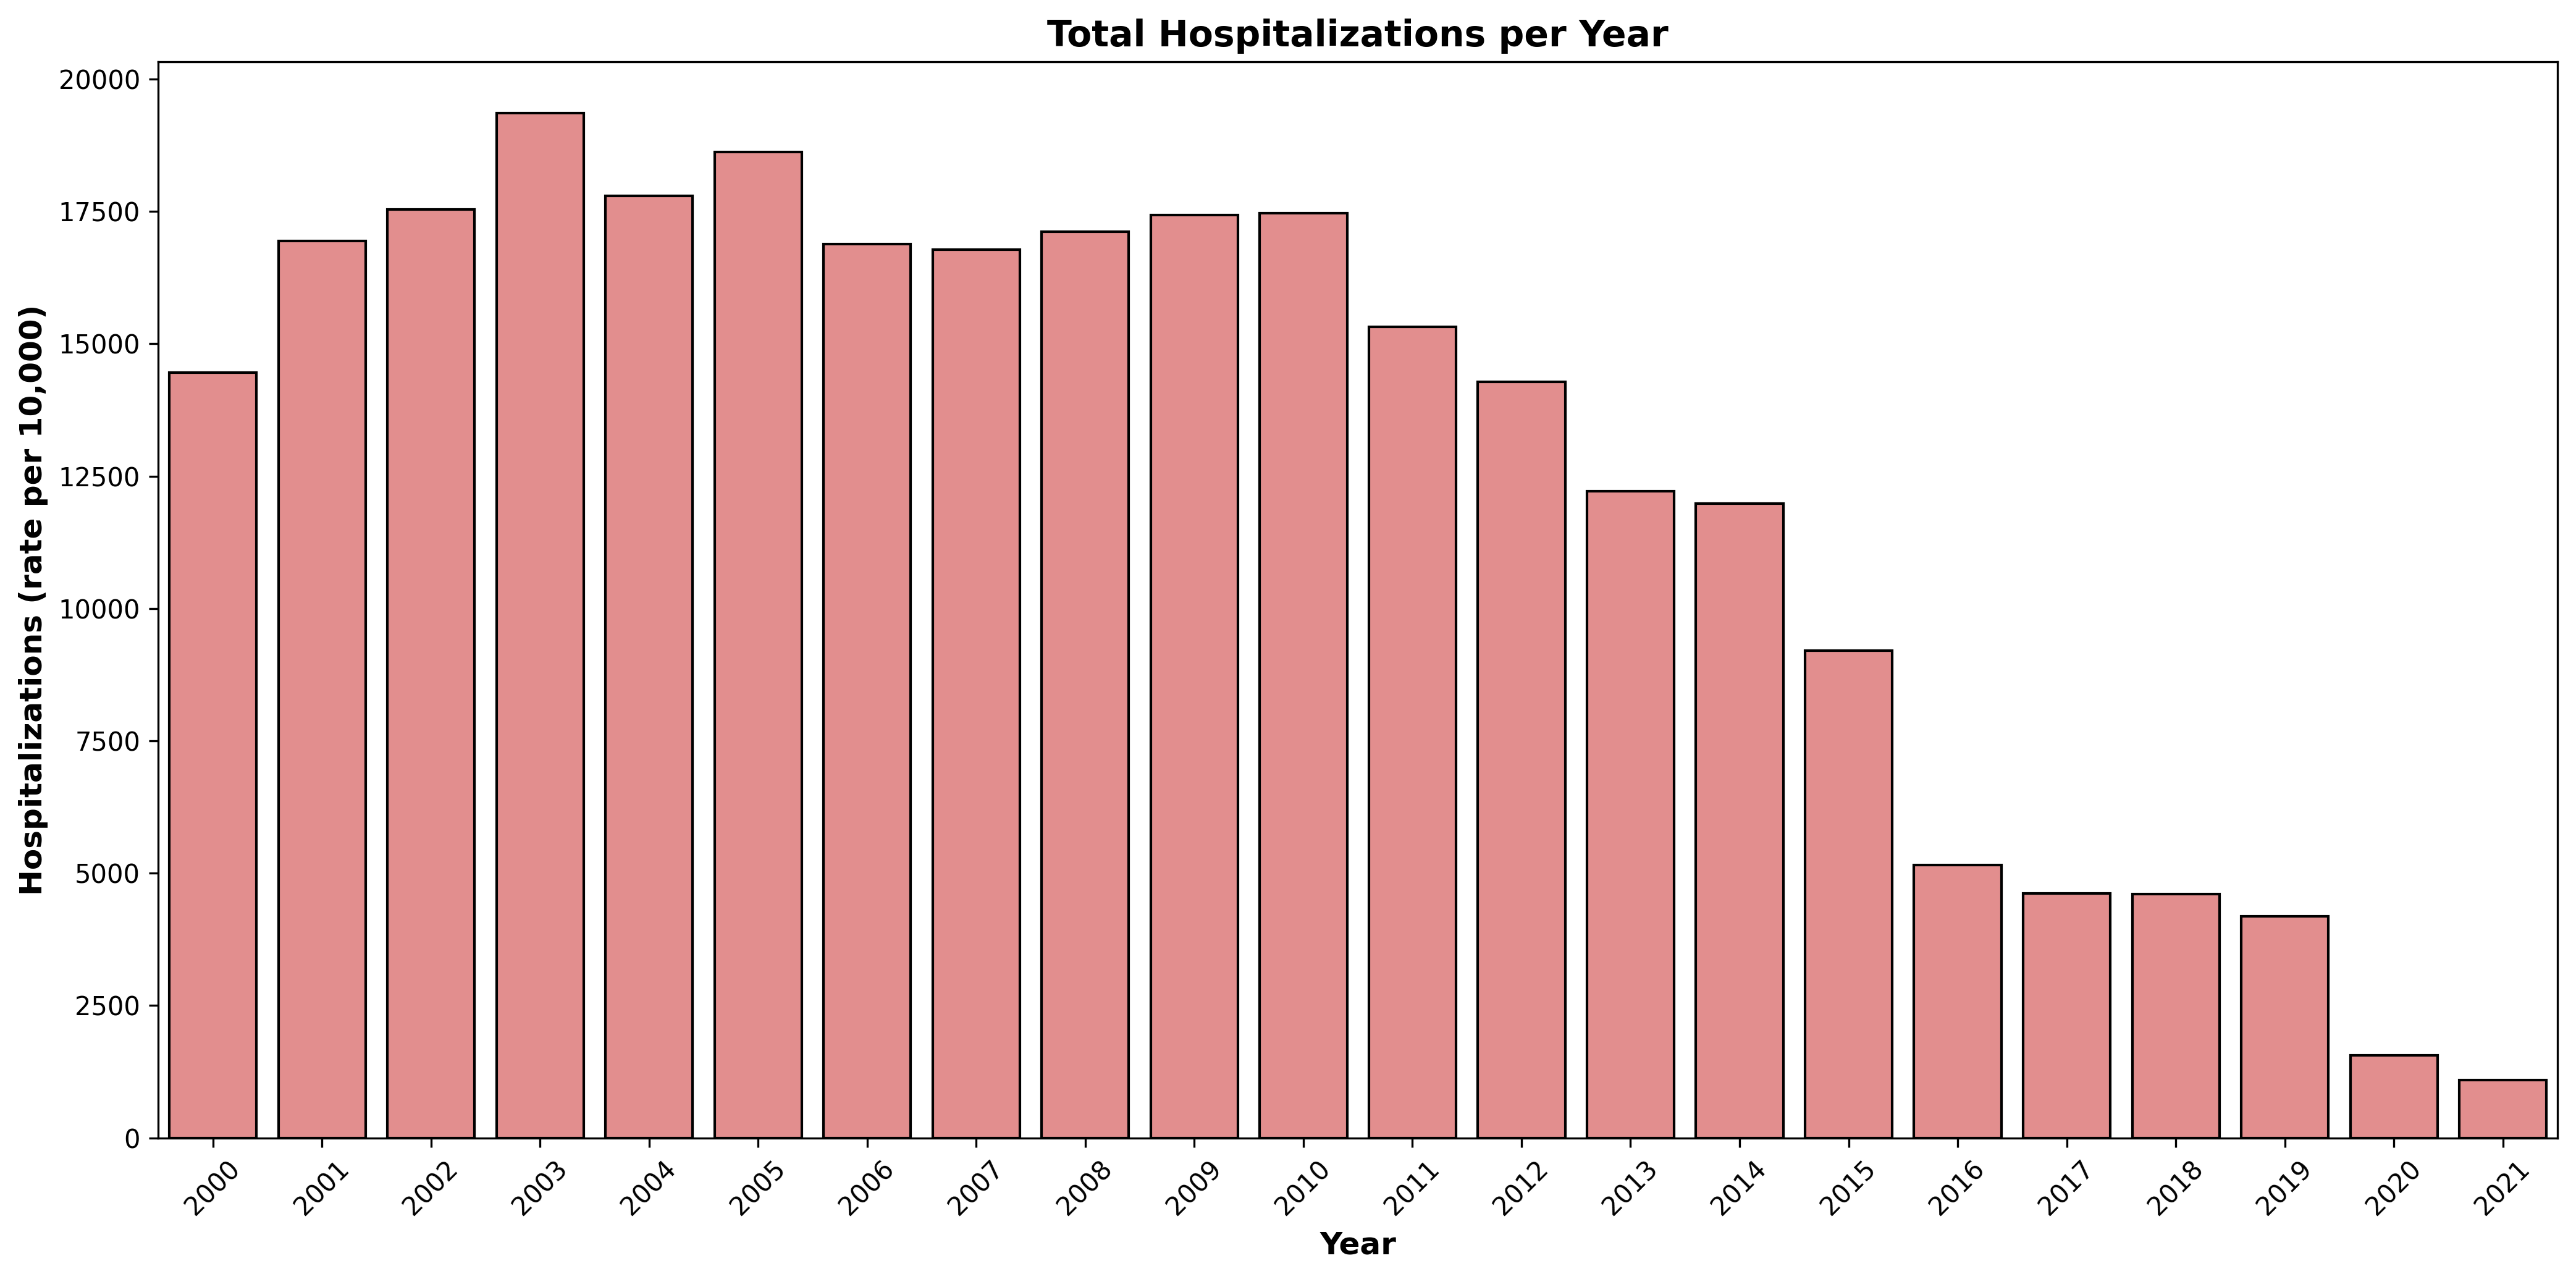

In [24]:
# Plot total number of hospitalizations due to asthma by year
hosp_values = asthma_hosp.groupby('Year')['Hospitalizations (rate per 10,000)'].sum().reset_index()

plt.figure(figsize=(14, 7), dpi=300)
sns.barplot(data=hosp_values, x='Year', y='Hospitalizations (rate per 10,000)', color='lightcoral', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Total Hospitalizations per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Hospitalizations (rate per 10,000)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
### Load shapefiles
# Counties
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'
county_gdf = gpd.read_file(url_county)

# States
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'
state_gdf = gpd.read_file(url_county)

# Exclude everthing outside the contiguous US
exclude_list = [15, 72, 2, 60, 66, 69, 78]
county_gdf = county_gdf.loc[~county_gdf['STATEFP'].astype(int).isin(exclude_list)]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]

# Convert to 5070
county_gdf = county_gdf.to_crs(5070) 
state_gdf = state_gdf.to_crs(5070)

# Create a FIPS code
county_gdf['FIPS'] = county_gdf.STATEFP + county_gdf.COUNTYFP

In [26]:
## Merge hospitalization data with geospatial data
# Convert county FIPS code columns to strings
asthma_hosp['CountyFIPS'] = asthma_hosp['CountyFIPS'].astype(str)

# Add leading zeros to FIPS code where needed
asthma_hosp['CountyFIPS'] = asthma_hosp['CountyFIPS'].apply(lambda x: x.zfill(5))

# Groupy values by FIPS 
grouped_hosp = asthma_hosp.groupby('CountyFIPS')['Hospitalizations (rate per 10,000)'].sum().reset_index()

# Merge the datasets on their FIPS code
merged_hosp = county_gdf.merge(grouped_hosp, left_on='FIPS', right_on='CountyFIPS', how='left')

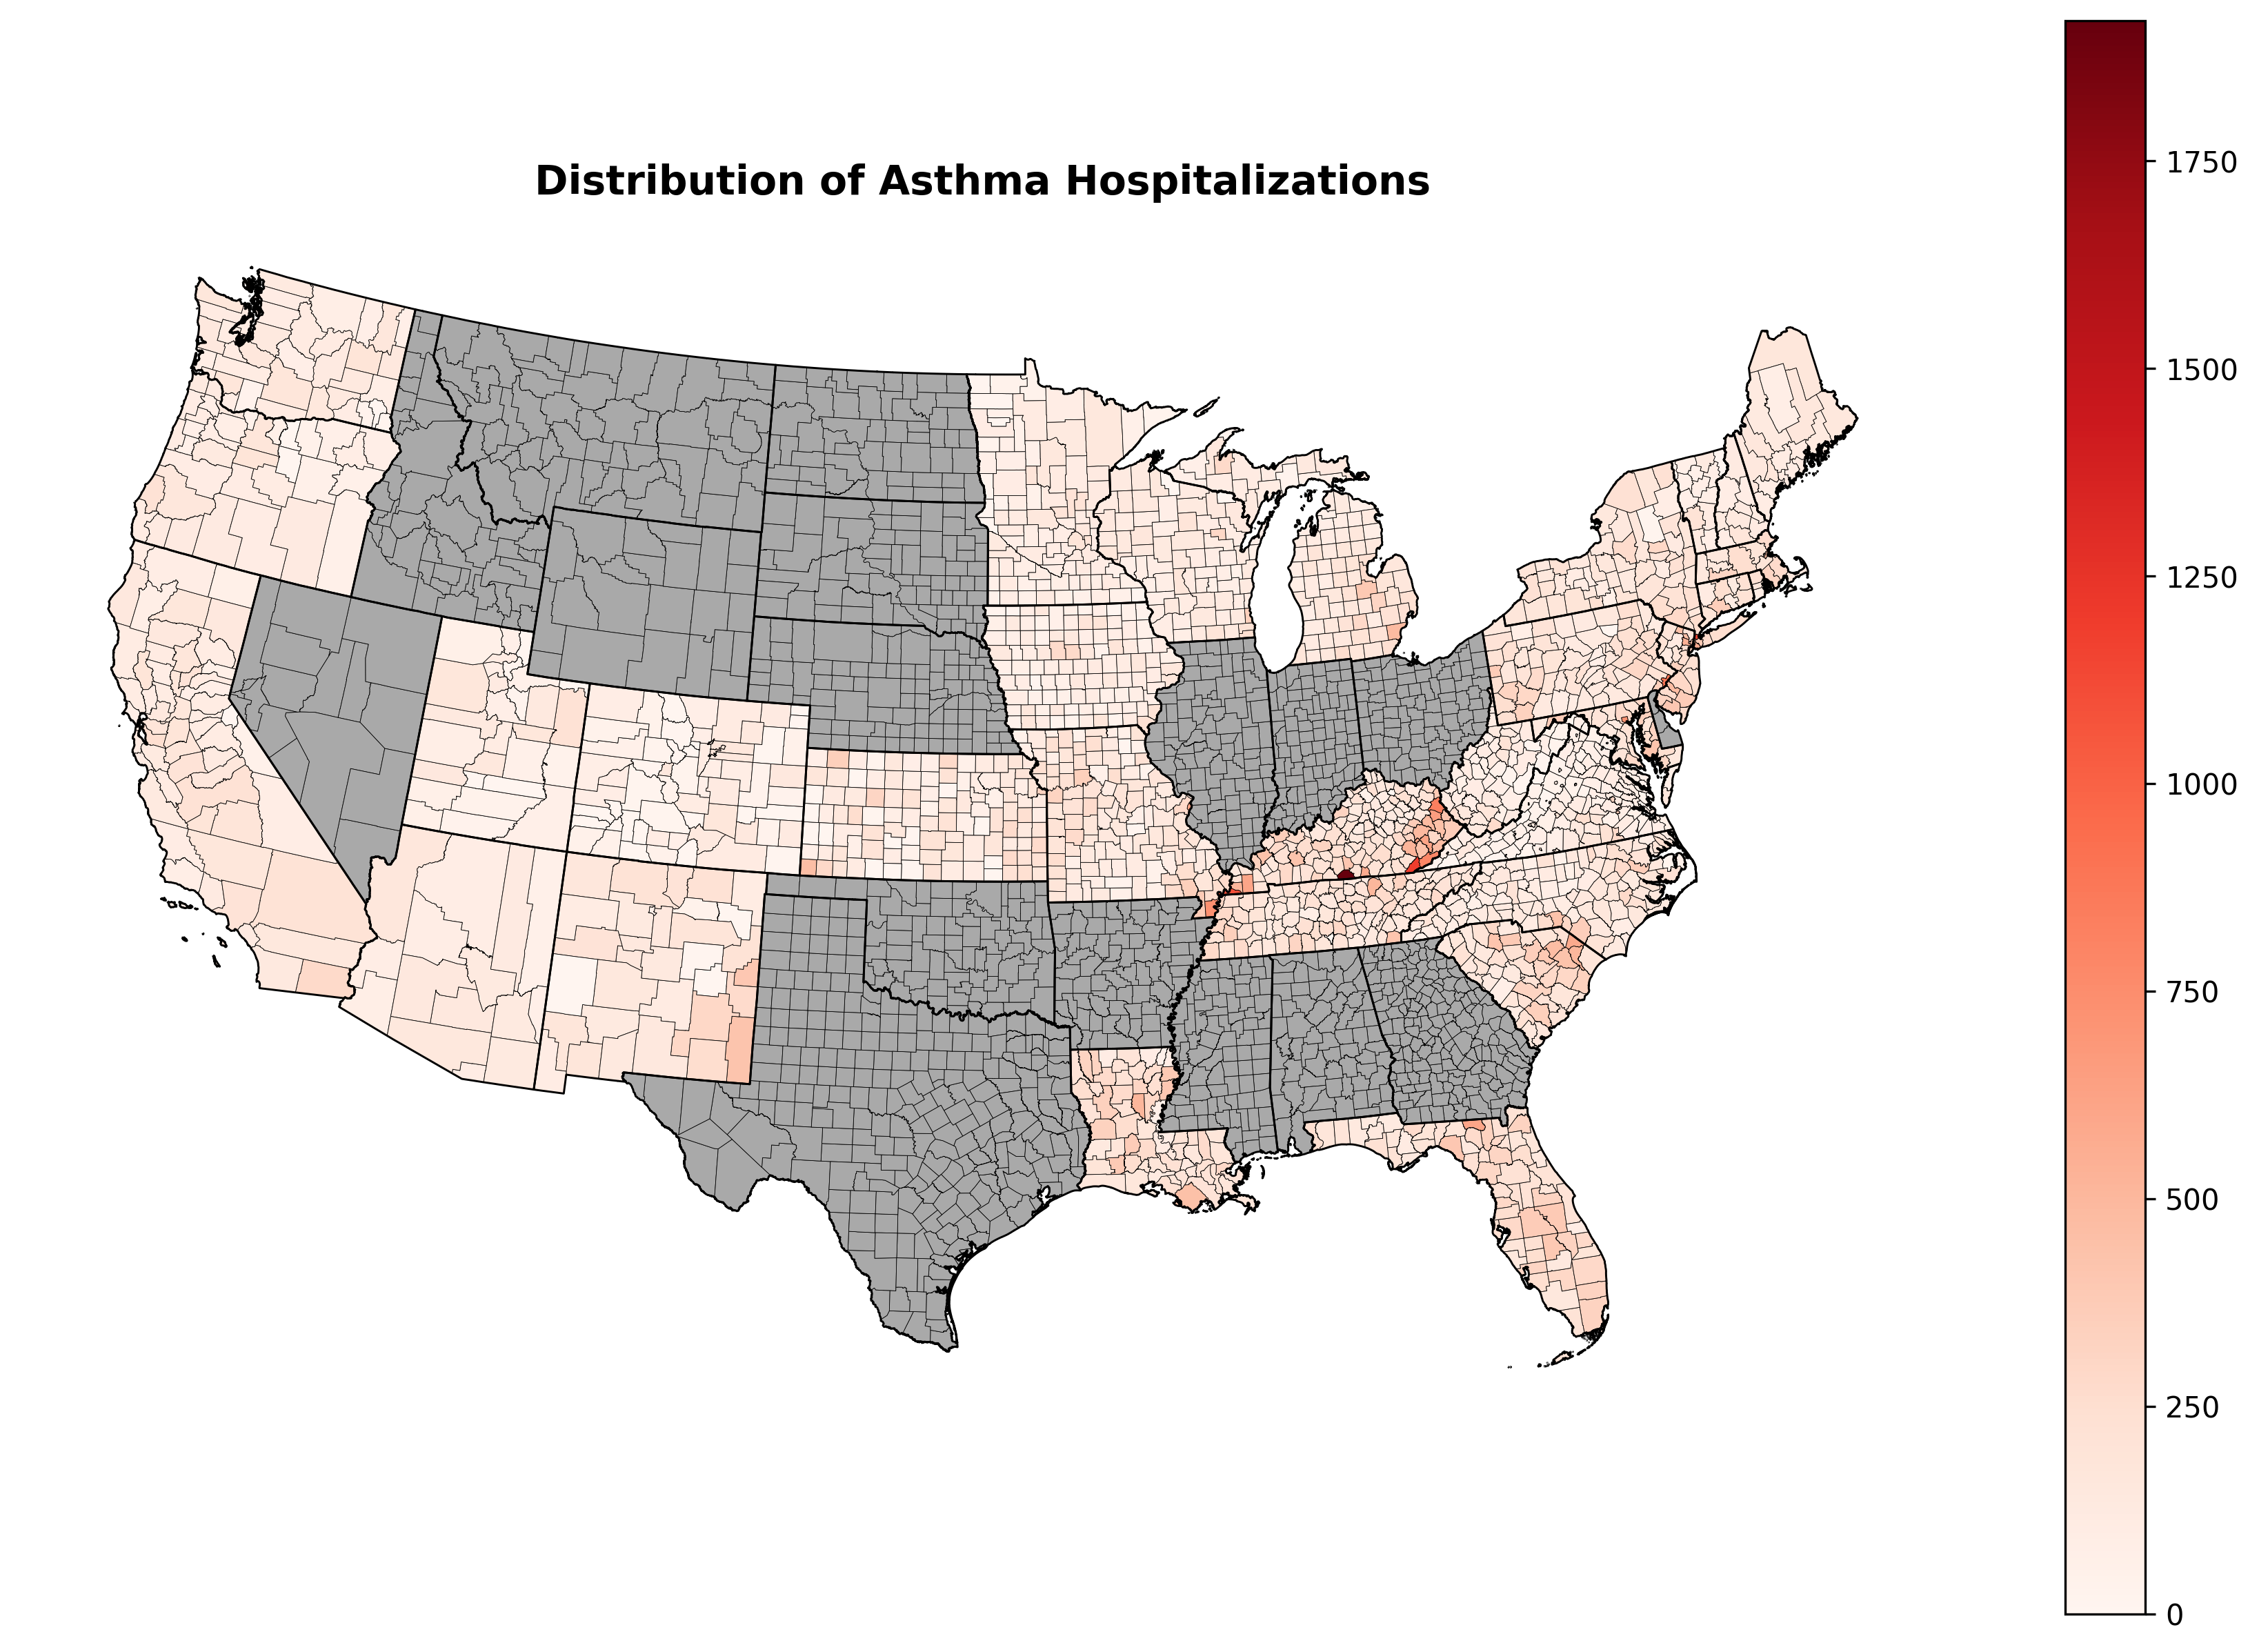

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)

# Choropleth Plot
merged_hosp.plot(column='Hospitalizations (rate per 10,000)', ax=ax, legend=True,
                 missing_kwds={'color': 'darkgrey'},
                 cmap='Reds', edgecolor='black', linewidth=0.2)
state_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.7)

ax.set_axis_off()
ax.set_title('Distribution of Asthma Hospitalizations', fontsize=14, fontweight='bold')
plt.show()

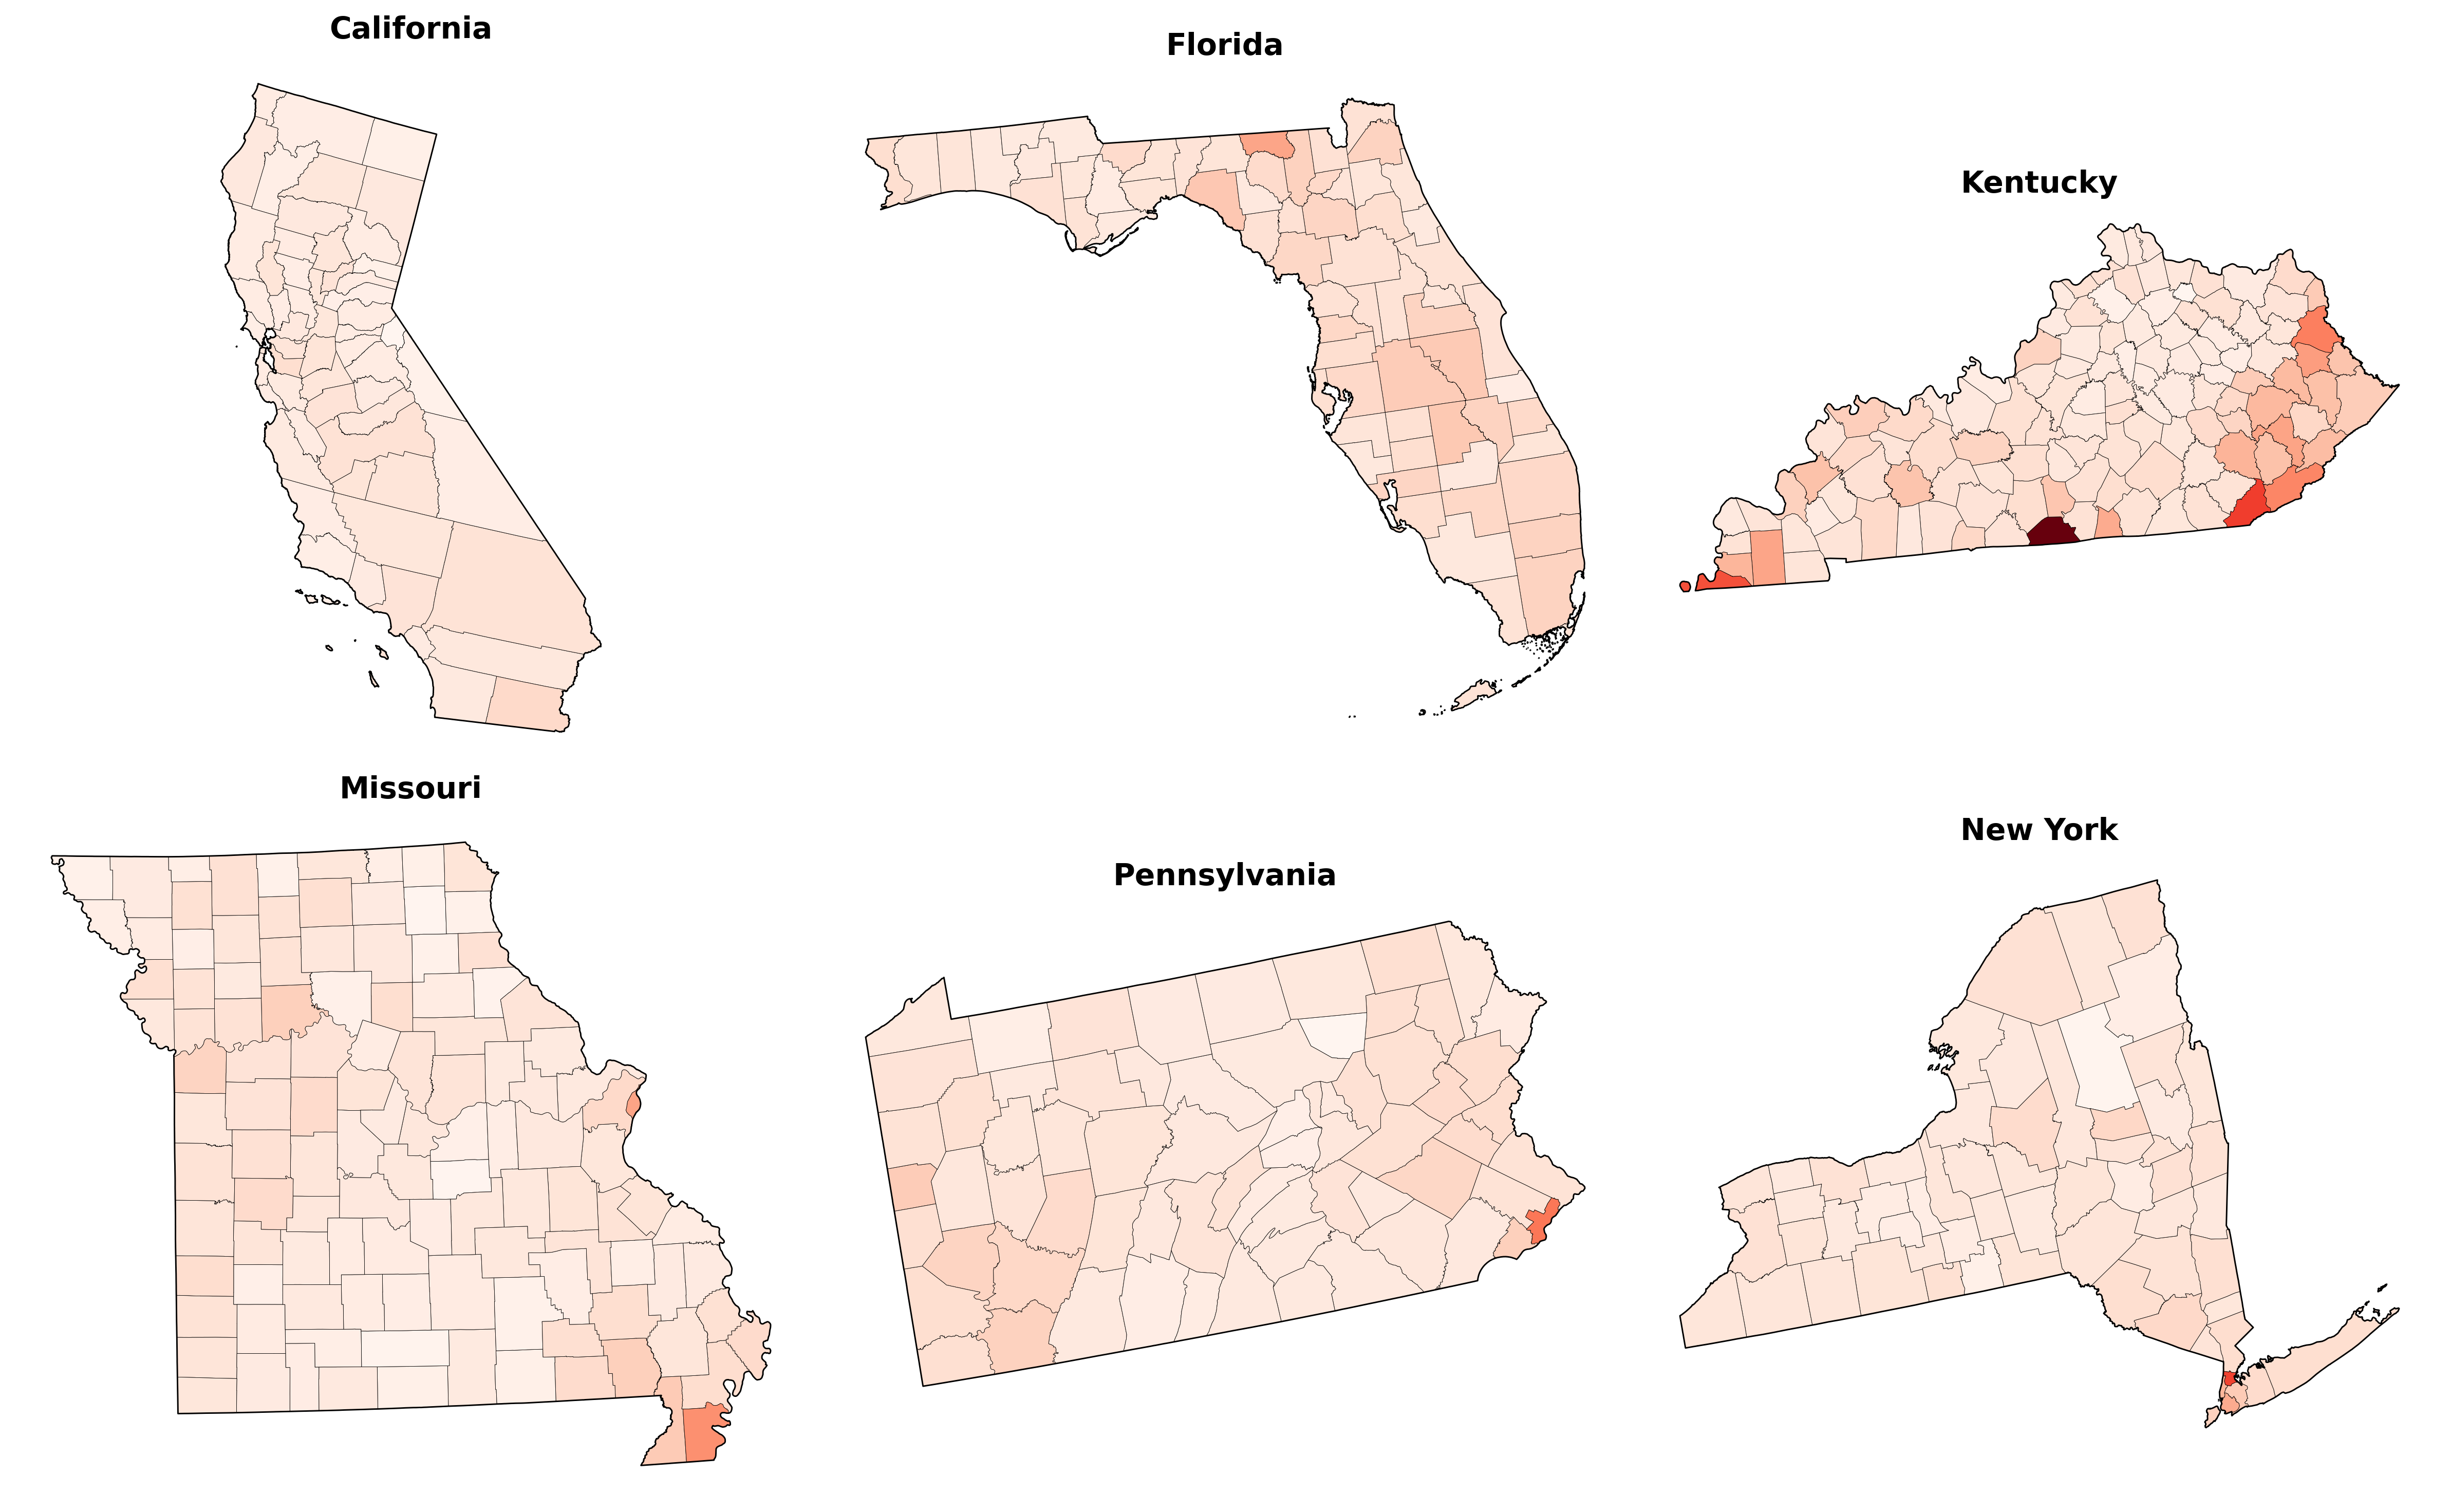

In [28]:
# Filter for state in the county data
ca_data = merged_hosp[merged_hosp['STATE_NAME'] == 'California']
fl_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Florida']
kt_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Kentucky']
ms_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Missouri']
penn_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Pennsylvania']
ny_data = merged_hosp[merged_hosp['STATE_NAME'] == 'New York']

# Filter for state in the state GDF
ca_state_boundary = state_gdf[state_gdf['NAME'] == 'California']
fl_state_boundary = state_gdf[state_gdf['NAME'] == 'Florida']
kt_state_boundary = state_gdf[state_gdf['NAME'] == 'Kentucky']
ms_state_boundary = state_gdf[state_gdf['NAME'] == 'Missouri']
penn_state_boundary = state_gdf[state_gdf['NAME'] == 'Pennsylvania']
ny_state_boundary = state_gdf[state_gdf['NAME'] == 'New York']

# Plot
fig, ax = plt.subplots(2, 3, figsize=(16, 10), dpi=300)

ca_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[0,0],
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
fl_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[0,1], 
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
kt_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[0,2],
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
ms_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[1,0], 
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
penn_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[1,1],
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
ny_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[1,2], 
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)

# Overlay state boundary for context
ca_state_boundary.plot(ax=ax[0,0], facecolor='none', edgecolor='black', linewidth=0.7)
fl_state_boundary.plot(ax=ax[0,1], facecolor='none', edgecolor='black', linewidth=0.7)
kt_state_boundary.plot(ax=ax[0,2], facecolor='none', edgecolor='black', linewidth=0.7)
ms_state_boundary.plot(ax=ax[1,0], facecolor='none', edgecolor='black', linewidth=0.7)
penn_state_boundary.plot(ax=ax[1,1], facecolor='none', edgecolor='black', linewidth=0.7)
ny_state_boundary.plot(ax=ax[1,2], facecolor='none', edgecolor='black', linewidth=0.7)

ax[0,0].set_axis_off()
ax[0,0].set_title('California', fontsize=14, fontweight='bold')
ax[0,1].set_axis_off()
ax[0,1].set_title('Florida', fontsize=14, fontweight='bold')
ax[0,2].set_axis_off()
ax[0,2].set_title('Kentucky', fontsize=14, fontweight='bold')
ax[1,0].set_axis_off()
ax[1,0].set_title('Missouri', fontsize=14, fontweight='bold')
ax[1,1].set_axis_off()
ax[1,1].set_title('Pennsylvania', fontsize=14, fontweight='bold')
ax[1,2].set_axis_off()
ax[1,2].set_title('New York', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [29]:
# Fix columns for successful merge
asthma_hosp = asthma_hosp.drop(columns='Data Comment')
asthma_hosp['CountyFIPS'] = asthma_hosp['CountyFIPS'].astype(int)

### ER visits due to Asthma

In [30]:
print(asthma_er.head())

   StateFIPS    State  CountyFIPS  County  Year Value Data Comment  Unnamed: 7
0          4  Arizona        4001  Apache  2005  31.0          NaN         NaN
1          4  Arizona        4001  Apache  2006  21.1          NaN         NaN
2          4  Arizona        4001  Apache  2007  21.1          NaN         NaN
3          4  Arizona        4001  Apache  2008  20.2          NaN         NaN
4          4  Arizona        4001  Apache  2009  44.0          NaN         NaN


In [31]:
asthma_er.rename(columns = {'Value':'ER visits for Asthma (rate per 10,000)'}, inplace = True) 
asthma_er.isnull().sum()

StateFIPS                                     0
State                                         0
CountyFIPS                                    0
County                                        0
Year                                          0
ER visits for Asthma (rate per 10,000)        0
Data Comment                              20193
Unnamed: 7                                22059
dtype: int64

In [32]:
asthma_er = asthma_er.drop(['Unnamed: 7', 'Data Comment'], axis=1)

### Merging Asthma Data -->  All Asthma Dataset

In [33]:
prev_hosp_merge = asthma_hosp.merge(asthma_prev, on=['StateFIPS','State', 'CountyFIPS', 'County', 'Year'], how='outer', indicator=True)
prev_hosp_merge

StateFIPS    State  CountyFIPS    County  Year  \
0              1  Alabama        1001   Autauga  2018   
1              1  Alabama        1001   Autauga  2019   
2              1  Alabama        1001   Autauga  2020   
3              1  Alabama        1001   Autauga  2021   
4              1  Alabama        1003   Baldwin  2018   
...          ...      ...         ...       ...   ...   
41096         56  Wyoming       56043  Washakie  2021   
41097         56  Wyoming       56045    Weston  2018   
41098         56  Wyoming       56045    Weston  2019   
41099         56  Wyoming       56045    Weston  2020   
41100         56  Wyoming       56045    Weston  2021   

       Hospitalizations (rate per 10,000)  Prevalence %      _merge  
0                                     NaN          10.2  right_only  
1                                     NaN           9.7  right_only  
2                                     NaN           9.8  right_only  
3                                     NaN          10.2  right_only  
4                                     NaN           9.6  right_only  
...                                   ...           ...         ...  
41096                                 NaN           9.6  right_only  
41097                                 NaN           9.3  right_only  
41098                                 NaN           9.0  right_only  
41099                                 NaN           9.8  right_only  
41100                                 NaN           9.7  right_only  

[41101 rows x 8 columns]

In [34]:
#Merging in ER visits
all_asthma = prev_hosp_merge.merge(asthma_er, on=['StateFIPS','State', 'CountyFIPS', 'County', 'Year'], how='outer')
all_asthma


StateFIPS    State  CountyFIPS    County  Year  \
0              1  Alabama        1001   Autauga  2018   
1              1  Alabama        1001   Autauga  2019   
2              1  Alabama        1001   Autauga  2020   
3              1  Alabama        1001   Autauga  2021   
4              1  Alabama        1003   Baldwin  2018   
...          ...      ...         ...       ...   ...   
41796         56  Wyoming       56043  Washakie  2021   
41797         56  Wyoming       56045    Weston  2018   
41798         56  Wyoming       56045    Weston  2019   
41799         56  Wyoming       56045    Weston  2020   
41800         56  Wyoming       56045    Weston  2021   

       Hospitalizations (rate per 10,000)  Prevalence %      _merge  \
0                                     NaN          10.2  right_only   
1                                     NaN           9.7  right_only   
2                                     NaN           9.8  right_only   
3                                     NaN          10.2  right_only   
4                                     NaN           9.6  right_only   
...                                   ...           ...         ...   
41796                                 NaN           9.6  right_only   
41797                                 NaN           9.3  right_only   
41798                                 NaN           9.0  right_only   
41799                                 NaN           9.8  right_only   
41800                                 NaN           9.7  right_only   

      ER visits for Asthma (rate per 10,000)  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN  
...                                      ...  
41796                                    NaN  
41797                                    NaN  
41798                                    NaN  
41799                                    NaN  
41800                                    NaN  

[41801 rows x 9 columns]

In [35]:
print(all_asthma.shape)

(41801, 9)


In [36]:
# Convert CountyFIPS to string
all_asthma['CountyFIPS'] = all_asthma['CountyFIPS'].astype(str).str.zfill(5)


In [37]:
all_asthma

StateFIPS    State CountyFIPS    County  Year  \
0              1  Alabama      01001   Autauga  2018   
1              1  Alabama      01001   Autauga  2019   
2              1  Alabama      01001   Autauga  2020   
3              1  Alabama      01001   Autauga  2021   
4              1  Alabama      01003   Baldwin  2018   
...          ...      ...        ...       ...   ...   
41796         56  Wyoming      56043  Washakie  2021   
41797         56  Wyoming      56045    Weston  2018   
41798         56  Wyoming      56045    Weston  2019   
41799         56  Wyoming      56045    Weston  2020   
41800         56  Wyoming      56045    Weston  2021   

       Hospitalizations (rate per 10,000)  Prevalence %      _merge  \
0                                     NaN          10.2  right_only   
1                                     NaN           9.7  right_only   
2                                     NaN           9.8  right_only   
3                                     NaN          10.2  right_only   
4                                     NaN           9.6  right_only   
...                                   ...           ...         ...   
41796                                 NaN           9.6  right_only   
41797                                 NaN           9.3  right_only   
41798                                 NaN           9.0  right_only   
41799                                 NaN           9.8  right_only   
41800                                 NaN           9.7  right_only   

      ER visits for Asthma (rate per 10,000)  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN  
...                                      ...  
41796                                    NaN  
41797                                    NaN  
41798                                    NaN  
41799                                    NaN  
41800                                    NaN  

[41801 rows x 9 columns]

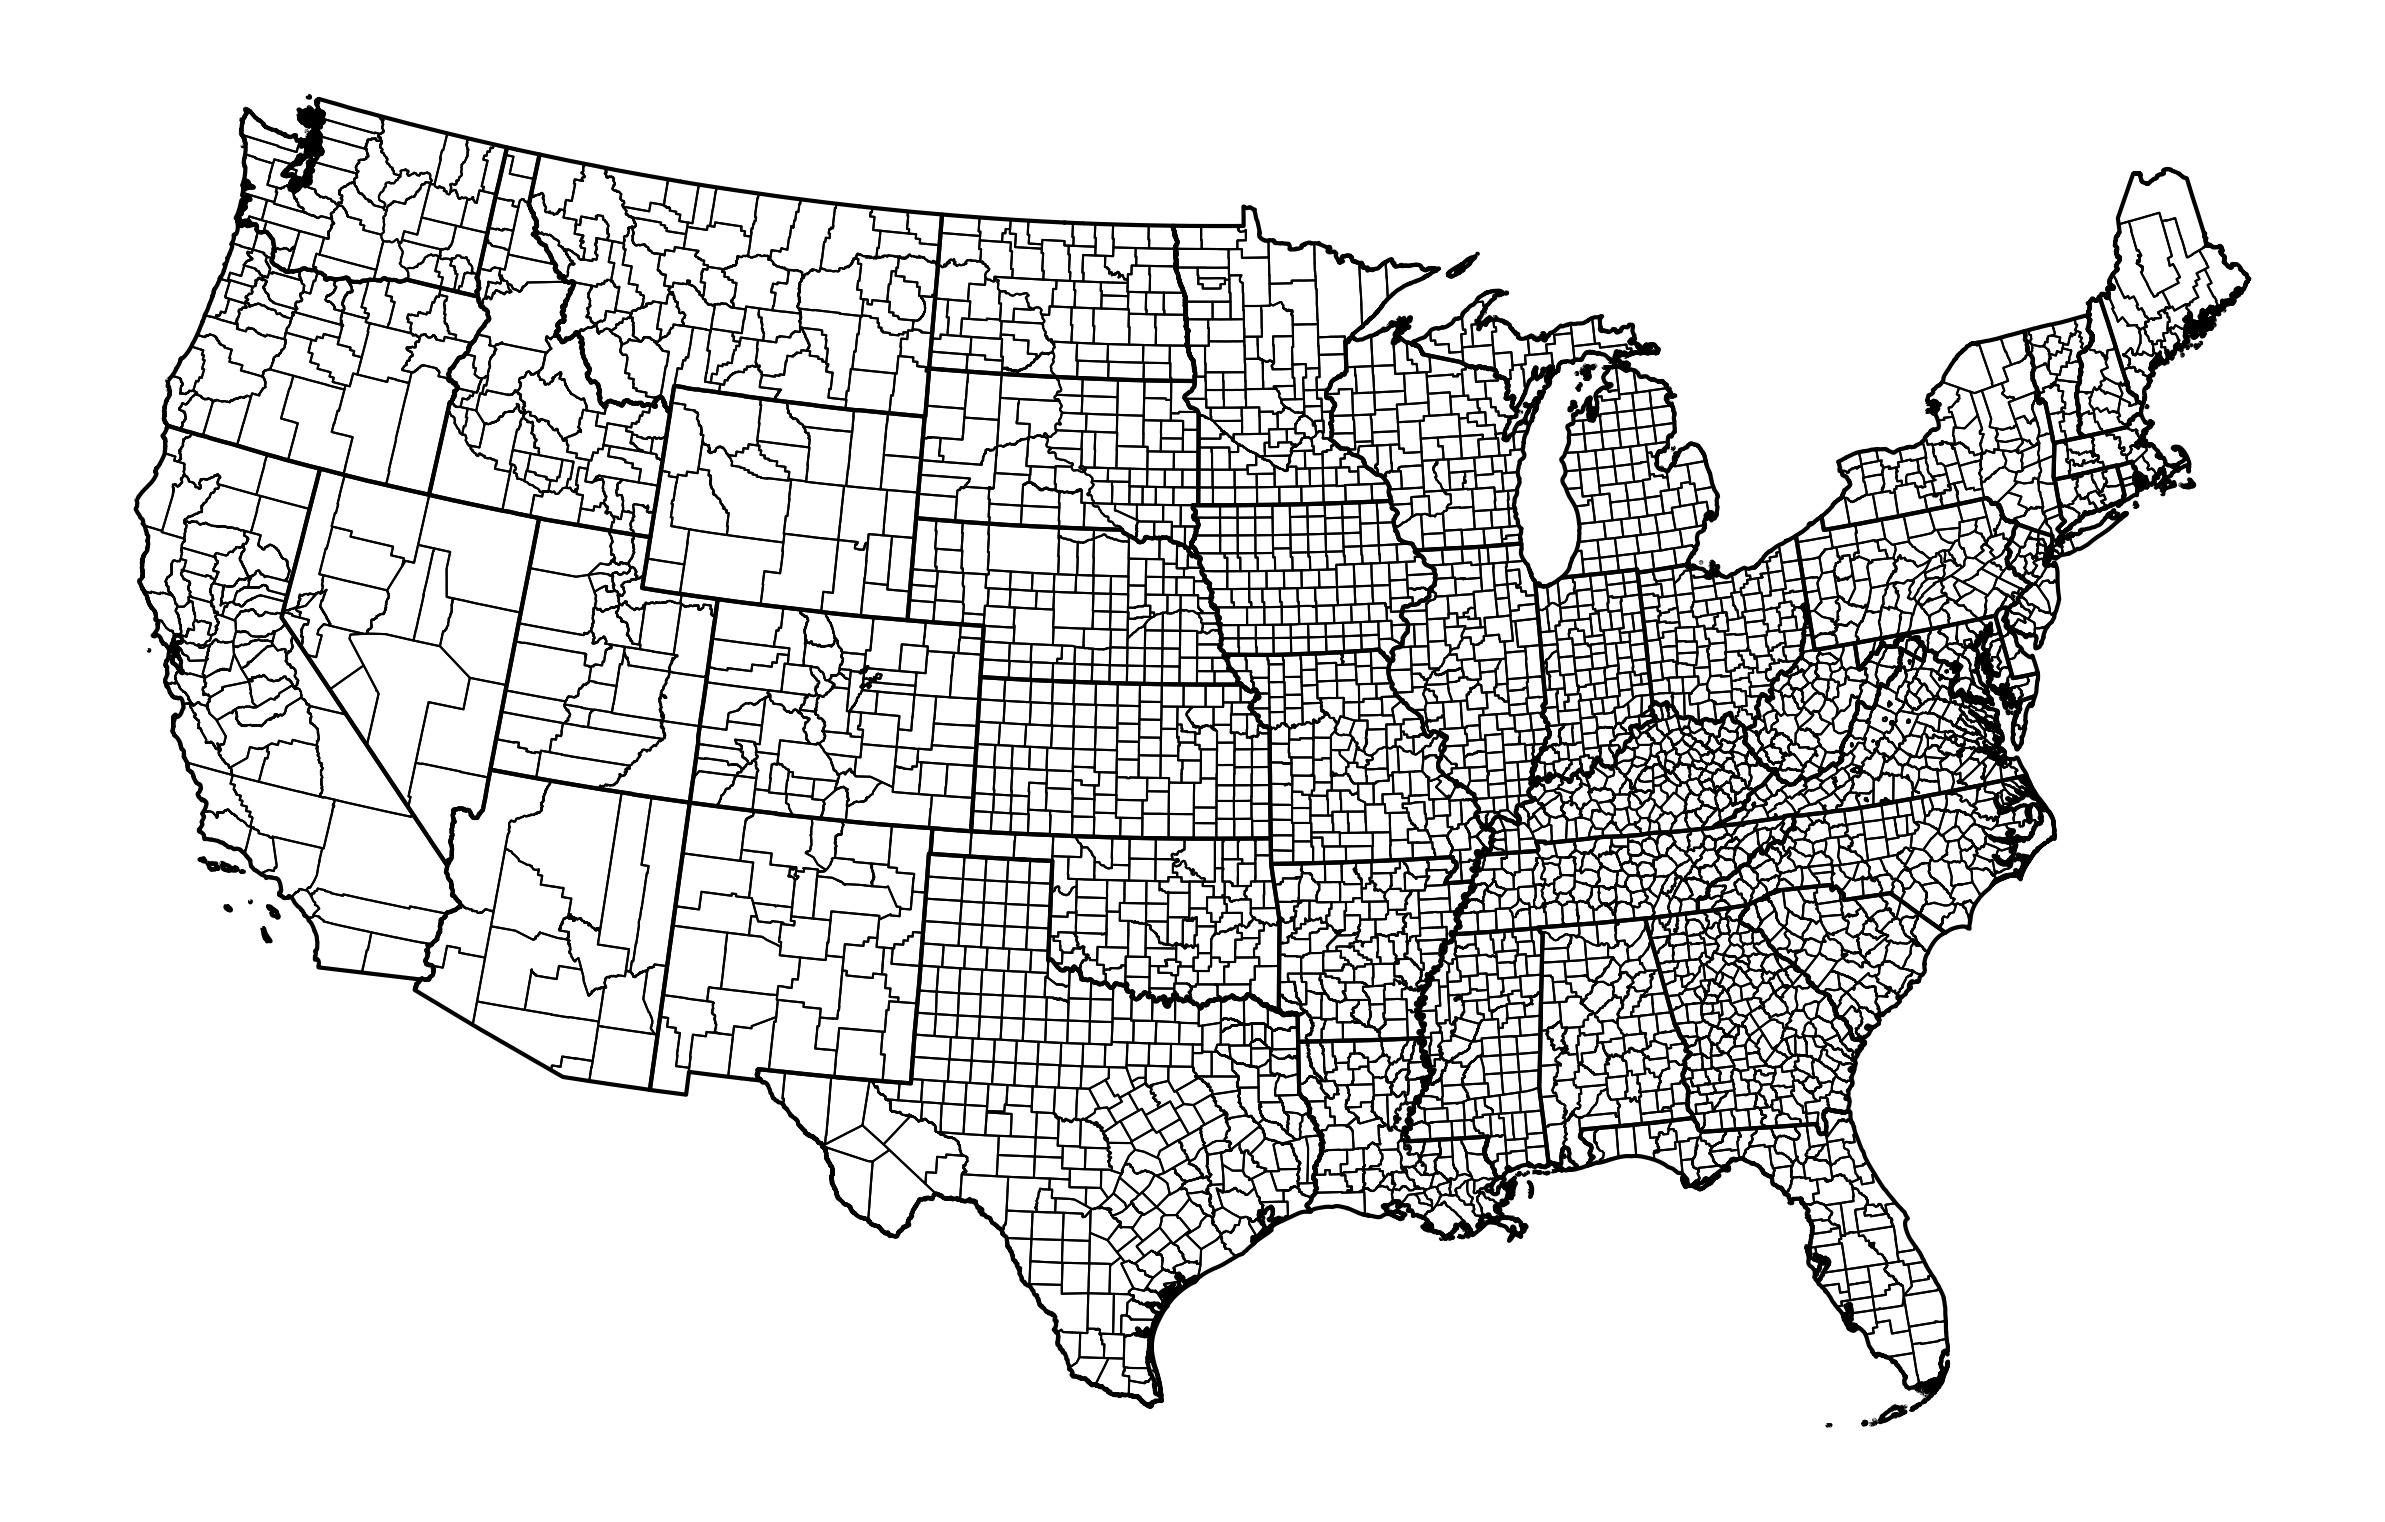

In [38]:
#Load data
"""url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'

#Make dataframes
county_gdf = gpd.read_file(url_county)
state_gdf = gpd.read_file(url_state)

#Exluding states outside mainland
ex_list = [15, 72, 2, 60, 66, 69, 78]
county_gdf = county_gdf.loc[~county_gdf['STATEFP'].astype(int).isin(ex_list)]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(ex_list)]

#Converting CRS
county_gdf = county_gdf.to_crs(5070)
state_gdf = state_gdf.to_crs(5070)"""

#Plot
fig, ax1 = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

county_gdf.plot(ax = ax1, linewidth = .5, edgecolor = 'black', facecolor = 'none')
state_gdf.plot(ax = ax1, linewidth = 1, edgecolor = 'black', facecolor = 'none')

ax1.set_axis_off()



In [39]:
all_asthma2018 = all_asthma[all_asthma['Year'] == 2018]

In [40]:
county_gdf.rename(columns = {'GEOID':'CountyFIPS'}, inplace = True) 

In [41]:
geo_pop = county_gdf.merge(all_asthma2018, on = 'CountyFIPS', how = 'left') 

In [42]:
geo_pop

STATEFP COUNTYFP  COUNTYNS        AFFGEOID CountyFIPS       NAME  \
0         20      161  00485044  0500000US20161      20161      Riley   
1         19      159  00465268  0500000US19159      19159   Ringgold   
2         30      009  01720111  0500000US30009      30009     Carbon   
3         16      007  00395090  0500000US16007      16007  Bear Lake   
4         55      011  01581065  0500000US55011      55011    Buffalo   
...      ...      ...       ...             ...        ...        ...   
3103      53      003  01533502  0500000US53003      53003     Asotin   
3104      13      043  00342852  0500000US13043      13043    Candler   
3105      48      451  01384011  0500000US48451      48451  Tom Green   
3106      39      089  01074057  0500000US39089      39089    Licking   
3107      19      193  00465285  0500000US19193      19193   Woodbury   

              NAMELSAD STUSPS  STATE_NAME LSAD  ...  \
0         Riley County     KS      Kansas   06  ...   
1      Ringgold County     IA        Iowa   06  ...   
2        Carbon County     MT     Montana   06  ...   
3     Bear Lake County     ID       Idaho   06  ...   
4       Buffalo County     WI   Wisconsin   06  ...   
...                ...    ...         ...  ...  ...   
3103     Asotin County     WA  Washington   06  ...   
3104    Candler County     GA     Georgia   06  ...   
3105  Tom Green County     TX       Texas   06  ...   
3106    Licking County     OH        Ohio   06  ...   
3107   Woodbury County     IA        Iowa   06  ...   

                                               geometry   FIPS StateFIPS  \
0     POLYGON ((-82124.738 1807458.230, -82132.336 1...  20161      20.0   
1     POLYGON ((127862.311 1979027.467, 127850.008 1...  19159      19.0   
2     POLYGON ((-1080043.778 2542886.554, -1071425.2...  30009      30.0   
3     POLYGON ((-1269953.954 2279390.018, -1269561.5...  16007      16.0   
4     POLYGON ((310980.660 2386653.979, 311029.751 2...  55011      55.0   
...                                                 ...    ...       ...   
3103  POLYGON ((-1649096.511 2757565.423, -1644531.2...  53003      53.0   
3104  POLYGON ((1282504.903 1123868.469, 1282643.946...  13043      13.0   
3105  POLYGON ((-497863.947 956184.834, -496234.612 ...  48451      48.0   
3106  POLYGON ((1115778.594 1958759.194, 1115689.498...  39089      39.0   
3107  POLYGON ((-40702.990 2173757.032, -37607.588 2...  19193      19.0   

           State     County    Year Hospitalizations (rate per 10,000)  \
0         Kansas      Riley  2018.0                                NaN   
1           Iowa   Ringgold  2018.0                                0.0   
2        Montana     Carbon  2018.0                                NaN   
3          Idaho  Bear Lake  2018.0                                NaN   
4      Wisconsin    Buffalo  2018.0                                NaN   
...          ...        ...     ...                                ...   
3103  Washington     Asotin  2018.0                                NaN   
3104     Georgia    Candler  2018.0                                NaN   
3105       Texas  Tom Green  2018.0                                NaN   
3106        Ohio    Licking  2018.0                                NaN   
3107        Iowa   Woodbury  2018.0                                2.1   

      Prevalence %      _merge  ER visits for Asthma (rate per 10,000)  
0              9.8        both                                     1.5  
1              8.8        both                                    28.8  
2              9.1  right_only                                     NaN  
3              9.6  right_only                                     NaN  
4              9.3        both                                    16.7  
...            ...         ...                                     ...  
3103          10.8        both                                     NaN  
3104          10.8  right_only                                     NaN  
3105    

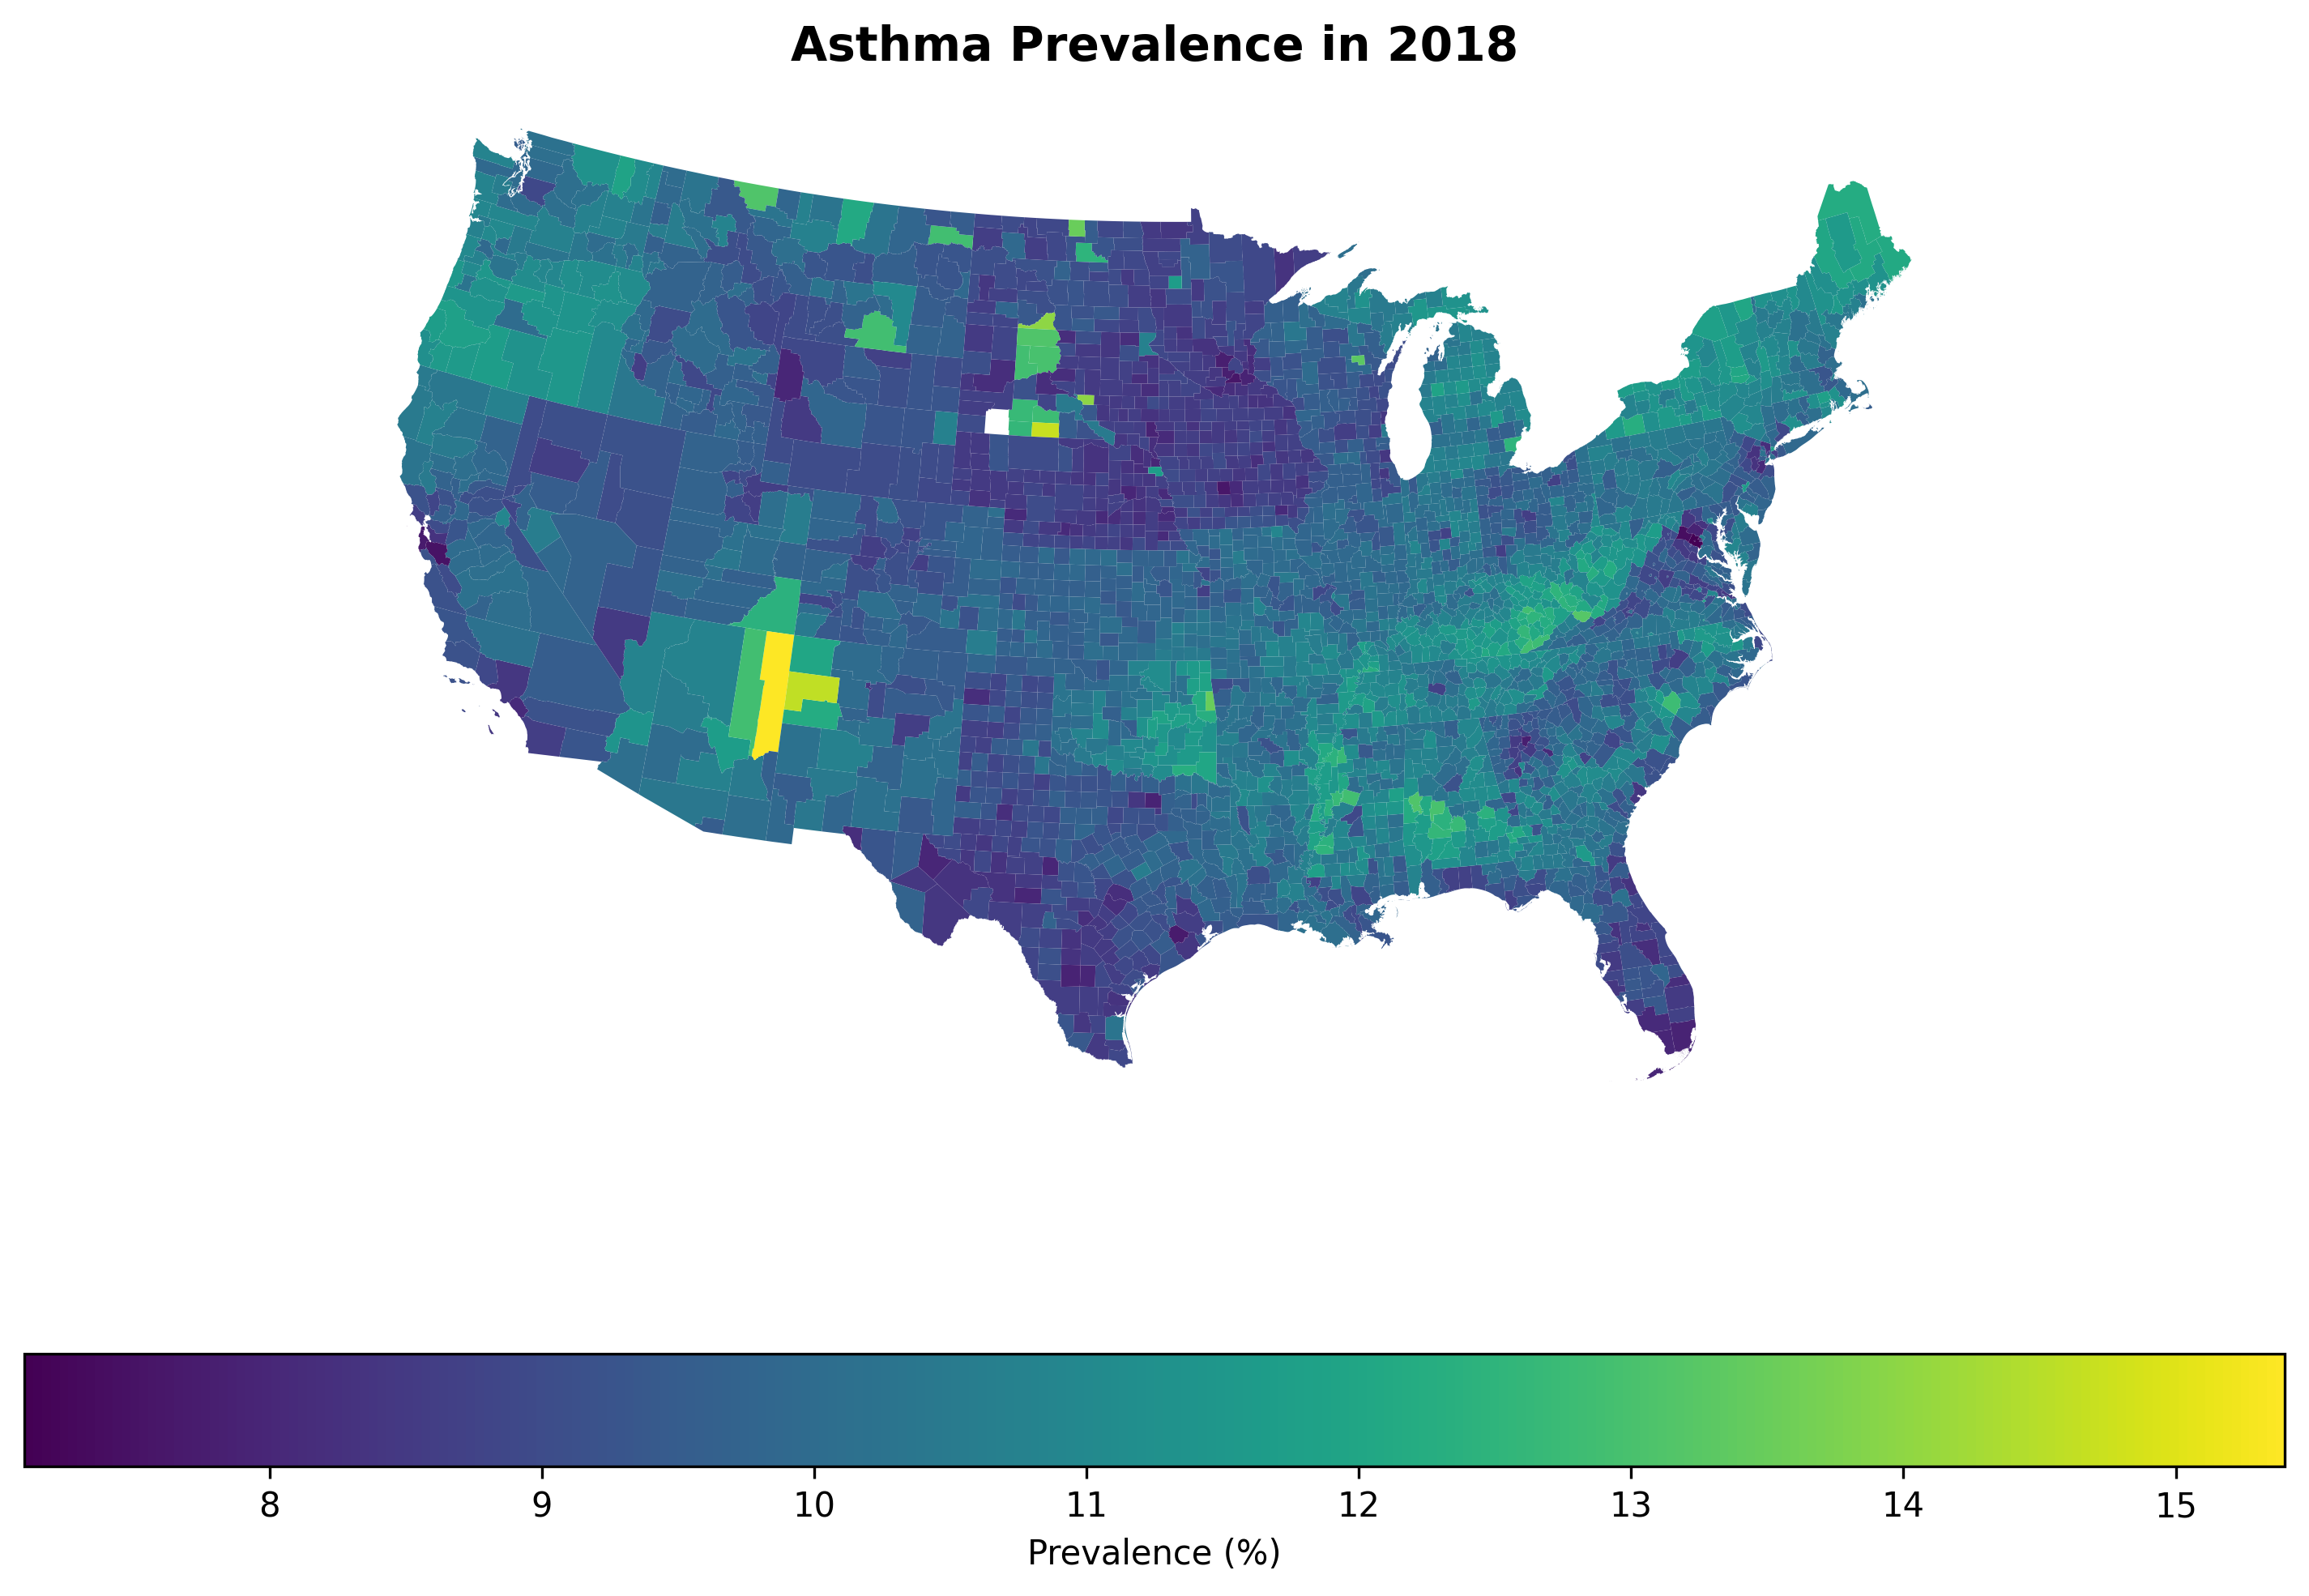

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=300)

geo_pop.plot(column = 'Prevalence %', cmap = 'viridis', legend = True, ax = ax,
             legend_kwds = {'label': 'Prevalence (%)',
                            'orientation': 'horizontal'})
ax.set_title('Asthma Prevalence in 2018', fontsize = 14, fontweight = 'bold')
ax.set_axis_off()

In [44]:
gdf = pd.merge(all_asthma, county_gdf)
gdf

StateFIPS    State CountyFIPS    County  Year  \
0              1  Alabama      01001   Autauga  2018   
1              1  Alabama      01001   Autauga  2019   
2              1  Alabama      01001   Autauga  2020   
3              1  Alabama      01001   Autauga  2021   
4              1  Alabama      01003   Baldwin  2018   
...          ...      ...        ...       ...   ...   
41654         56  Wyoming      56043  Washakie  2021   
41655         56  Wyoming      56045    Weston  2018   
41656         56  Wyoming      56045    Weston  2019   
41657         56  Wyoming      56045    Weston  2020   
41658         56  Wyoming      56045    Weston  2021   

       Hospitalizations (rate per 10,000)  Prevalence %      _merge  \
0                                     NaN          10.2  right_only   
1                                     NaN           9.7  right_only   
2                                     NaN           9.8  right_only   
3                                     NaN          10.2  right_only   
4                                     NaN           9.6  right_only   
...                                   ...           ...         ...   
41654                                 NaN           9.6  right_only   
41655                                 NaN           9.3  right_only   
41656                                 NaN           9.0  right_only   
41657                                 NaN           9.8  right_only   
41658                                 NaN           9.7  right_only   

      ER visits for Asthma (rate per 10,000) STATEFP  ...        AFFGEOID  \
0                                        NaN      01  ...  0500000US01001   
1                                        NaN      01  ...  0500000US01001   
2                                        NaN      01  ...  0500000US01001   
3                                        NaN      01  ...  0500000US01001   
4                                        NaN      01  ...  0500000US01003   
...                                      ...     ...  ...             ...   
41654                                    NaN      56  ...  0500000US56043   
41655                                    NaN      56  ...  0500000US56045   
41656                                    NaN      56  ...  0500000US56045   
41657                                    NaN      56  ...  0500000US56045   
41658                                    NaN      56  ...  0500000US56045   

           NAME         NAMELSAD STUSPS STATE_NAME LSAD       ALAND  \
0       Autauga   Autauga County     AL    Alabama   06  1539634184   
1       Autauga   Autauga County     AL    Alabama   06  1539634184   
2       Autauga   Autauga County     AL    Alabama   06  1539634184   
3       Autauga   Autauga County     AL    Alabama   06  1539634184   
4       Baldwin   Baldwin County     AL    Alabama   06  4117656514   
...         ...              ...    ...        ...  ...         ...   
41654  Washakie  Washakie County     WY    Wyoming   06  5798152471   
41655    Weston    Weston County     WY    Wyoming   06  6210804121   
41656    Weston    Weston County     WY    Wyoming   06  6210804121   
41657    Weston    Weston County     WY    Wyoming   06  6210804121   
41658    Weston    Weston County     WY    Wyoming   06  6210804121   

           AWATER                                           geometry   FIPS  
0        25674812  POLYGON ((845502.651 1105502.561, 845570.149 1...  01001  
1        25674812  POLYGON ((845502.651 1105502.561, 845570.149 1...  01001  
2        25674812  POLYGON ((845502.651 1105502.561, 845570.149 1...  01001  
3        25674812  POLYGON ((845502.651 1105502.561, 845570.149 1...  01001  
4      1132955729  POLYGON ((765297.991 826660.876, 765703.766 82...  01003  
...           ...                                                ...    ...  
41654    10415890  POLYGON ((-997597.050 2419071.785, -994119.161...  56043  
41655     5225499  POLYGON ((-724949.677 2365214.220, -722597.332...  56045  
4

In [45]:
all_asthma2018 = gdf[all_asthma['Year'] == 2018]
all_asthma2018

C:\Users\psorm\AppData\Local\Temp\ipykernel_5996\1480513501.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_asthma2018 = gdf[all_asthma['Year'] == 2018]


StateFIPS      State CountyFIPS      County  Year  \
0              1    Alabama      01001     Autauga  2018   
4              1    Alabama      01003     Baldwin  2018   
8              1    Alabama      01005     Barbour  2018   
12             1    Alabama      01007        Bibb  2018   
16             1    Alabama      01009      Blount  2018   
...          ...        ...        ...         ...   ...   
41551         55  Wisconsin      55141        Wood  2006   
41573         56    Wyoming      56003    Big Horn  2020   
41595         56    Wyoming      56015      Goshen  2018   
41617         56    Wyoming      56025     Natrona  2020   
41639         56    Wyoming      56037  Sweetwater  2018   

       Hospitalizations (rate per 10,000)  Prevalence %      _merge  \
0                                     NaN          10.2  right_only   
4                                     NaN           9.6  right_only   
8                                     NaN          11.7  right_only   
12                                    NaN          10.3  right_only   
16                                    NaN          10.2  right_only   
...                                   ...           ...         ...   
41551                                 8.6           NaN   left_only   
41573                                 NaN          10.0  right_only   
41595                                 NaN           9.0  right_only   
41617                                 NaN           9.9  right_only   
41639                                 NaN           9.0  right_only   

      ER visits for Asthma (rate per 10,000) STATEFP  ...        AFFGEOID  \
0                                        NaN      01  ...  0500000US01001   
4                                        NaN      01  ...  0500000US01003   
8                                        NaN      01  ...  0500000US01005   
12                                       NaN      01  ...  0500000US01007   
16                                       NaN      01  ...  0500000US01009   
...                                      ...     ...  ...             ...   
41551                                   28.9      55  ...  0500000US55141   
41573                                    NaN      56  ...  0500000US56003   
41595                                    NaN      56  ...  0500000US56015   
41617                                    NaN      56  ...  0500000US56025   
41639                                    NaN      56  ...  0500000US56037   

             NAME           NAMELSAD STUSPS STATE_NAME LSAD        ALAND  \
0         Autauga     Autauga County     AL    Alabama   06   1539634184   
4         Baldwin     Baldwin County     AL    Alabama   06   4117656514   
8         Barbour     Barbour County     AL    Alabama   06   2292160149   
12           Bibb        Bibb County     AL    Alabama   06   1612188717   
16         Blount      Blount County     AL    Alabama   06   1670259090   
...           ...                ...    ...        ...  ...          ...   
41551        Wood        Wood County     WI  Wisconsin   06   2053959984   
41573    Big Horn    Big Horn County     WY    Wyoming   06   8124681753   
41595      Goshen      Goshen County     WY    Wyoming   06   5764310957   
41617     Natrona     Natrona County     WY    Wyoming   06  13831928341   
41639  Sweetwater  Sweetwater County     WY    Wyoming   06  27005754359   

           AWATER                                           geometry   FIPS  
0        25674812  POLYGON ((845502.651 1105502.561, 845570.149 1...  01001  
4      1132955729  POLYGON ((765297.991 826660.876, 765703.766 82...  01003  
8        50523213  POLYGON ((966818.148 1001565.672, 967065.502 1...  01005  
12        9572303  POLYGON ((795521.328 1139598.901, 805055.230 1...  01007  
16       14860281  POLYGON ((828860.688 1238570.568, 829200.834 1...  01009  
...           ...                                                ...    ...  
41551    41993013  POLYGON ((451903.392 2380367.9

### Air Quality

In [46]:
# Merge AQI data from 2000 - 2019
all_aqi_data = pd.concat([AQI2000, AQI2001, AQI2002, AQI2003, AQI2004, AQI2005, AQI2006, AQI2007, AQI2008, AQI2009, AQI2010,
                          AQI2011, AQI2012, AQI2013, AQI2014, AQI2015, AQI2016, AQI2017, AQI2018, AQI2019], ignore_index=True)

In [47]:
# Find NaN values
nan_values = all_aqi_data.isna().sum()
print(nan_values)
print(all_aqi_data.shape)

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64
(21471, 18)


In [48]:
all_aqi_data
all_aqi_data = all_aqi_data.sort_values(by = ['County', 'Year'], ascending = True)
all_aqi_data

State     County  Year  Days with AQI  Good Days  \
861    South Carolina  Abbeville  2000            219         98   
1975   South Carolina  Abbeville  2001            234        124   
3100   South Carolina  Abbeville  2002            235        127   
4226   South Carolina  Abbeville  2003            224        153   
5357   South Carolina  Abbeville  2004            220        159   
...               ...        ...   ...            ...        ...   
16367         Arizona       Yuma  2015            365        260   
17408         Arizona       Yuma  2016            366        228   
18438         Arizona       Yuma  2017            365        241   
19467         Arizona       Yuma  2018            365        239   
20489         Arizona       Yuma  2019            365        265   

       Moderate Days  Unhealthy for Sensitive Groups Days  Unhealthy Days  \
861               89                                   29               3   
1975              79                                   30               1   
3100              71                                   29               8   
4226              60                                   11               0   
5357              53                                    8               0   
...              ...                                  ...             ...   
16367             91                                   13               0   
17408            124                                   12               1   
18438            110                                   12               1   
19467            110                                   15               1   
20489             97                                    3               0   

       Very Unhealthy Days  Hazardous Days  Max AQI  90th Percentile AQI  \
861                      0               0      159                  105   
1975                     0               0      164                  105   
3100                     0               0      192                  126   
4226                     0               0      150                   93   
5357                     0               0      150                   80   
...                    ...             ...      ...                  ...   
16367                    1               0      266                   77   
17408                    0               1      419                   77   
18438                    1               0      235                   72   
19467                    0               0      169                   80   
20489                    0               0      129                   67   

       Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  
861            54        0         0         219           0          0  
1975           50        0         0         234           0          0  
3100           49        0         0         235           0          0  
4226           44        0         0         224           0          0  
5357           42        0         0         220           0          0  
...           ...      ...       ...         ...         ...        ...  
16367          43        0         0         212          20        133  
17408          46        0         0         213          43        110  
18438          45        0         0         209          50        106  
19467          45        0         0         235          33         97  
20489          45        0         0         273          42         50  

[21471 rows x 18 columns]

In [49]:
nan_values = all_aqi_data.isna().sum()
print(nan_values)


State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64


In [52]:
columns_to_keep = ['State','FIPS', 'County', 'geometry']
gdf_extra = gdf[columns_to_keep]

State   FIPS    County  \
0      Alabama  01001   Autauga   
1      Alabama  01001   Autauga   
2      Alabama  01001   Autauga   
3      Alabama  01001   Autauga   
4      Alabama  01003   Baldwin   
...        ...    ...       ...   
41654  Wyoming  56043  Washakie   
41655  Wyoming  56045    Weston   
41656  Wyoming  56045    Weston   
41657  Wyoming  56045    Weston   
41658  Wyoming  56045    Weston   

                                                geometry  
0      POLYGON ((845502.651 1105502.561, 845570.149 1...  
1      POLYGON ((845502.651 1105502.561, 845570.149 1...  
2      POLYGON ((845502.651 1105502.561, 845570.149 1...  
3      POLYGON ((845502.651 1105502.561, 845570.149 1...  
4      POLYGON ((765297.991 826660.876, 765703.766 82...  
...                                                  ...  
41654  POLYGON ((-997597.050 2419071.785, -994119.161...  
41655  POLYGON ((-724949.677 2365214.220, -722597.332...  
41656  POLYGON ((-724949.677 2365214.220, -722597.332...  
41657  POLYGON ((-724949.677 2365214.220, -722597.332...  
41658  POLYGON ((-724949.677 2365214.220, -722597.332...  

[41659 rows x 4 columns]

In [53]:
all_aqi_data = all_aqi_data.merge(gdf_extra, left_on = ['State', 'County'], right_on = ['State', 'County'], how = 'left')
all_aqi_data

State     County  Year  Days with AQI  Good Days  \
0       South Carolina  Abbeville  2000            219         98   
1       South Carolina  Abbeville  2000            219         98   
2       South Carolina  Abbeville  2000            219         98   
3       South Carolina  Abbeville  2000            219         98   
4       South Carolina  Abbeville  2000            219         98   
...                ...        ...   ...            ...        ...   
314012         Arizona       Yuma  2019            365        265   
314013         Arizona       Yuma  2019            365        265   
314014         Arizona       Yuma  2019            365        265   
314015         Arizona       Yuma  2019            365        265   
314016         Arizona       Yuma  2019            365        265   

        Moderate Days  Unhealthy for Sensitive Groups Days  Unhealthy Days  \
0                  89                                   29               3   
1                  89                                   29               3   
2                  89                                   29               3   
3                  89                                   29               3   
4                  89                                   29               3   
...               ...                                  ...             ...   
314012             97                                    3               0   
314013             97                                    3               0   
314014             97                                    3               0   
314015             97                                    3               0   
314016             97                                    3               0   

        Very Unhealthy Days  Hazardous Days  Max AQI  90th Percentile AQI  \
0                         0               0      159                  105   
1                         0               0      159                  105   
2                         0               0      159                  105   
3                         0               0      159                  105   
4                         0               0      159                  105   
...                     ...             ...      ...                  ...   
314012                    0               0      129                   67   
314013                    0               0      129                   67   
314014                    0               0      129                   67   
314015                    0               0      129                   67   
314016                    0               0      129                   67   

        Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  \
0               54        0         0         219           0          0   
1               54        0         0         219           0          0   
2               54        0         0         219           0          0   
3               54        0         0         219           0          0   
4               54        0         0         219           0          0   
...            ...      ...       ...         ...         ...        ...   
314012          45        0         0         273          42         50   
314013          45        0         0         273          42         50   
314014          45        0         0         273          42         50   
314015          45        0         0         273          42         50   
314016          45        0         0         273          42         50   

         FIPS                                           geometry  
0       45001  POLYGON ((1208444.711 1323075.671, 1213152.084...  
1       45001  POLYGON ((1208444.711 1323075.671, 1213152.084...  
2       45001  POLYGON ((1208444.711 1323075.671, 1213152.084...  
3       45001  POLYGON ((1208444.711 1323075.671, 1213152.084...  
4       45001  POLYGON ((1208444.711 1323075.671, 1213152.084...  
...       .